JPEG (Joint Photographic Experts Group) is a widely used image compression algorithm that efficiently reduces the file size of digital images while preserving a reasonable level of image quality. The JPEG compression algorithm utilizes a combination of two main techniques: discrete cosine transform (DCT) and quantization.

The first step in the JPEG compression process is to convert the image from the RGB color space to the YCbCr color space. The YCbCr color model represents the image using three components: Y (luminance), Cb (blue-difference chrominance), and Cr (red-difference chrominance). This conversion separates the color information from the brightness information, allowing for more effective compression.

Once the image is in the YCbCr color space, it is divided into small, non-overlapping blocks, typically 8x8 pixels in size. Each block is then subjected to a mathematical transformation called the discrete cosine transform (DCT). The DCT converts each block from the spatial domain to the frequency domain, representing the image in terms of its frequency components.

In the frequency domain, the DCT coefficients represent the contribution of different frequencies to the block. The coefficients are arranged in a specific order, with the lower frequency components typically having higher magnitudes. This property forms the basis for the subsequent compression steps.

After the DCT is applied, the next step is quantization. Quantization reduces the precision of the DCT coefficients by dividing them by a set of quantization tables. These tables contain values that determine the level of compression and, therefore, the amount of lossy compression applied. Higher compression ratios lead to greater loss of image quality.

During quantization, the higher frequency components, which correspond to fine details, are more heavily quantized than the lower frequency components, which represent larger patterns and overall structure. This differential treatment allows for greater reduction in file size while minimizing the perceived impact on image quality.

Finally, the quantized DCT coefficients are compressed using entropy encoding, typically using the Huffman coding technique. Huffman coding replaces frequently occurring sequences of symbols with shorter codes, resulting in further reduction of the file size. The encoding process produces a compressed image file that can be decompressed to reconstruct an approximation of the original image.

When the JPEG file is viewed or opened, the decompression process reverses the steps. The Huffman codes are decoded to retrieve the quantized DCT coefficients, which are then multiplied by the quantization tables to obtain the approximate DCT coefficients. The inverse DCT is then applied to convert the coefficients back to the spatial domain. Finally, the color information is restored by converting the image from YCbCr to RGB color space, resulting in an approximation of the original image.

The Following code implements a Huffman coding algorithm for generating a codebook, which is a mapping of symbols to their corresponding Huffman codes. Huffman coding is a popular compression technique that assigns shorter codes to more frequently occurring symbols, thereby reducing the overall size of the encoded data.

In [ ]:
from collections import Counter

class HuffmanNode:
    def __init__(self, symbol=None, frequency=0, left=None, right=None):
        self.symbol = symbol
        self.frequency = frequency
        self.left = left
        self.right = right


class HuffmanTree:
    def __init__(self, counts):
        self.root = self._build_tree(counts)

    def _build_tree(self, counts):
        nodes = [HuffmanNode(symbol=symbol, frequency=frequency) for symbol, frequency in counts.items()]

        while len(nodes) > 1:
            nodes = sorted(nodes, key=lambda x: x.frequency)

            left_node = nodes.pop(0)
            right_node = nodes.pop(0)
            parent_frequency = left_node.frequency + right_node.frequency
            parent_node = HuffmanNode(frequency=parent_frequency, left=left_node, right=right_node)

            nodes.append(parent_node)

        return nodes[0]

    def _traverse_tree(self, node, code='', codebook=None):
        if codebook is None:
            codebook = {}

        if node.symbol is not None:
            codebook[node.symbol] = code
        else:
            self._traverse_tree(node.left, code + '0', codebook)
            self._traverse_tree(node.right, code + '1', codebook)

        return codebook

    def get_codebook(self):
        codebook = self._traverse_tree(self.root)
        return codebook

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Zigzag scanning pattern for 8x8 block
zigzag = np.array([
    [ 0,  1,  5,  6, 14, 15, 27, 28],
    [ 2,  4,  7, 13, 16, 26, 29, 42],
    [ 3,  8, 12, 17, 25, 30, 41, 43],
    [ 9, 11, 18, 24, 31, 40, 44, 53],
    [10, 19, 23, 32, 39, 45, 52, 54],
    [20, 22, 33, 38, 46, 51, 55, 60],
    [21, 34, 37, 47, 50, 56, 59, 61],
    [35, 36, 48, 49, 57, 58, 62, 63]
])

The following code defines a function that generates a quantization matrix based on the specified component and quality factor. In image compression, quantization is the process of reducing the precision of the values in an image, which helps in achieving compression by discarding less important information.

Inside the function, there are predefined quantization tables for the luminance and chrominance components. These tables are matrices that assign different quantization values to different frequency components of the image. The values in these tables are based on empirical knowledge and can be adjusted to achieve different compression effects.

The next step in the function is to adjust the quantization table based on the quality factor. The quality_factor is calculated by clamping the quality parameter between 1 and 99. Then, depending on the component type, the q value is computed. For the luminance component (component = 0), q is determined by the quality factor using a piecewise function, resulting in a higher quality factor resulting in a smaller q value. For the chrominance components (component = 1 or 2), q is calculated as the reciprocal of the quality factor, with a constant factor of 50.

In [ ]:
def get_quantization_matrix(component, quality=50):
    # Default quantization tables for luminance (component = 0) and chrominance (component = 1 or 2)
    quantization_tables = [
        # Luminance (component = 0)
        np.array([
            [16, 11, 10, 16, 24, 40, 51, 61],
            [12, 12, 14, 19, 26, 58, 60, 55],
            [14, 13, 16, 24, 40, 57, 69, 56],
            [14, 17, 22, 29, 51, 87, 80, 62],
            [18, 22, 37, 56, 68, 109, 103, 77],
            [24, 35, 55, 64, 81, 104, 113, 92],
            [49, 64, 78, 87, 103, 121, 120, 101],
            [72, 92, 95, 98, 112, 100, 103, 99],
        ]),
        # Chrominance (component = 1 or 2)
        np.array([
            [17, 18, 24, 47, 99, 99, 99, 99],
            [18, 21, 26, 66, 99, 99, 99, 99],
            [24, 26, 56, 99, 99, 99, 99, 99],
            [47, 66, 99, 99, 99, 99, 99, 99],
            [99, 99, 99, 99, 99, 99, 99, 99],
            [99, 99, 99, 99, 99, 99, 99, 99],
            [99, 99, 99, 99, 99, 99, 99, 99],
            [99, 99, 99, 99, 99, 99, 99, 99],
        ]),
        np.array([
            [17, 18, 24, 47, 99, 99, 99, 99],
            [18, 21, 26, 66, 99, 99, 99, 99],
            [24, 26, 56, 99, 99, 99, 99, 99],
            [47, 66, 99, 99, 99, 99, 99, 99],
            [99, 99, 99, 99, 99, 99, 99, 99],
            [99, 99, 99, 99, 99, 99, 99, 99],
            [99, 99, 99, 99, 99, 99, 99, 99],
            [99, 99, 99, 99, 99, 99, 99, 99],
        ])
    ]

    # Adjust the quantization table based on the quality factor
    quality_factor = max(1, min(99, quality))
    if component == 0:
        q = ((100 - quality_factor) / 50) if quality_factor < 50 else (2 - (quality_factor / 50))
    else:
        q = (50 / quality_factor)

    # print(component)
    quantization_matrix = np.round(quantization_tables[component] * q)
    quantization_matrix = np.clip(quantization_matrix, 1, 255).astype(np.int32)

    return quantization_matrix

Following code encodes a raw image to a jpeg image. First, the code converts the input image from the BGR color space to the YCbCr color space using the OpenCV function cv2.cvtColor. The resulting YCbCr image is stored in the ycbcr_image variable. The YCbCr color space separates the image into luminance (Y) and chrominance (Cb and Cr) components.

Next, the code splits the YCbCr image into blocks of 8x8 pixels. It creates an empty list blocks to store these blocks, and then iterates over the image pixels to fill the blocks. The rows and cols variables represent the dimensions of the YCbCr image. The image is divided into non-overlapping 8x8 blocks, and each block is stored in the blocks list.

After that, the Discrete Cosine Transform (DCT) is applied to each block in the blocks list. The code initializes an empty list dct_blocks to store the transformed blocks. It iterates over each block and each color channel (Y, Cb, Cr) to calculate the DCT using the cv2.dct function. The transformed blocks are stored in the dct_blocks list.

Following the DCT, the code quantizes the DCT coefficients of each block using zigzag scanning. It creates an empty list quantized_blocks to store the quantized blocks. For each block and each color channel, it reshapes the DCT block to a 1D array and retrieves the corresponding quantization matrix using the get_quantization_matrix function. The DCT coefficients are divided by the quantization matrix, rounded to the nearest integer, and stored in the quantized_blocks list.

In [ ]:
def encode_jpeg(image, quality=50):
    # Convert image to YCbCr color space
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    rows, cols, _ = ycbcr_image.shape

    # Split the image into blocks of 8x8 pixels
    blocks = [np.zeros((8, 8, 3)) for _ in range((rows // 8) * (cols // 8))]
    for i in range(0, rows, 8):
        for j in range(0, cols, 8):
            block_index = (i // 8) * (cols // 8) + (j // 8)
            blocks[block_index] = ycbcr_image[i:i+8, j:j+8, :]

    # Apply Discrete Cosine Transform (DCT) to each block
    dct_blocks = [np.zeros((8, 8, 3)) for _ in range(len(blocks))]
    for i, block in enumerate(blocks):
        for k in range(3):
            dct_blocks[i][:, :, k] = cv2.dct(block[:, :, k].astype(np.float32))

    # Quantize the DCT coefficients with zigzag scanning
    quantized_blocks = [np.zeros((8, 8, 3)) for _ in range(len(dct_blocks))]
    for i, dct_block in enumerate(dct_blocks):
        for k in range(3):
            reshaped_dct = dct_block[:, :, k].reshape(-1)  # Reshape the DCT block to 1D
            quantization_matrix = get_quantization_matrix(k, quality)
            quantized_blocks[i][:, :, k] = np.round(reshaped_dct[zigzag].reshape(8, 8) / quantization_matrix)

    return quantized_blocks, cols, rows

The following code decode a jpeg image back to a form to can be visualized normally. The first step in the function is to retrieve the inverse quantization matrix using the get_quantization_matrix function. The inverse quantization matrix is obtained for the luminance component (component = 0) and is used to reverse the quantization process during decoding.

Next, the function initializes an empty ycbcr_image array with the same dimensions as the original image. This array will store the reconstructed image in the YCbCr color space.

The code then proceeds to reconstruct the DCT blocks. It iterates over each quantized block in the quantized_blocks list. For each block and each color channel (Y, Cb, Cr), it multiplies the quantized block with the corresponding element of the inverse quantization matrix to obtain the DCT block.

After reconstructing the DCT blocks, the function applies the Inverse Discrete Cosine Transform (IDCT) to each block. It initializes an empty idct_block array with the same dimensions as the DCT blocks. For each block and each color channel, it applies the IDCT using the cv2.idct function to obtain the IDCT block.

The code then combines the reconstructed blocks by placing each IDCT block at the appropriate position in the ycbcr_image array. The x and y variables are used to calculate the position of each block based on its index.

Next, the function converts the ycbcr_image back to the BGR color space using the cv2.cvtColor function. The resulting image is stored in the decoded_image variable.

Finally, the code performs clipping to ensure that all pixel values are within the range of 0 to 255, and converts the image to the np.uint8 data type.

In [ ]:
def decode_jpeg(quantized_blocks, cols, rows, quality=50):
    # Get the inverse quantization matrix
    inv_quantization_matrix = get_quantization_matrix(0, quality)

    # Initialize the output image
    ycbcr_image = np.zeros((rows, cols, 3))

    # Reconstruct the DCT blocks
    for i, quantized_block in enumerate(quantized_blocks):
        dct_block = np.zeros((8, 8, 3))
        for k in range(3):
            dct_block[:, :, k] = quantized_block[:, :, k] * inv_quantization_matrix

        # Apply Inverse Discrete Cosine Transform (IDCT) to each block
        idct_block = np.zeros((8, 8, 3))
        for k in range(3):
            idct_block[:, :, k] = cv2.idct(dct_block[:, :, k].astype(np.float32))

        # Combine the reconstructed blocks
        x = (i % (cols // 8)) * 8
        y = (i // (cols // 8)) * 8
        ycbcr_image[y:y+8, x:x+8, :] = idct_block

    # Convert the image back to BGR color space
    decoded_image = cv2.cvtColor(ycbcr_image.astype(np.uint8), cv2.COLOR_YCrCb2BGR)
    decoded_image = np.clip(decoded_image, 0, 255).astype(np.uint8)

    return decoded_image

The following code perform jpeg compression on the first sample image using predifined methods. It also encode the result of the first function using huffman encoding to calculates the amount of space it will aqcuire to store on dist and calculates the compression ratio based on this represnetation and the original image size which as can be seen it decreases the size significantly.

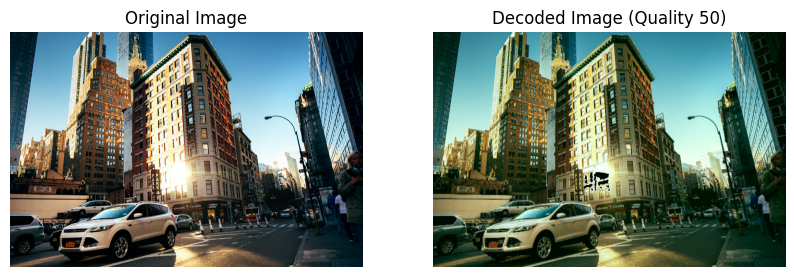

Original Image Size: 59885568 bytes
Compressed Image Size: 9334372 bytes
Compression Ratio: 84.41


In [ ]:
# Load the input image
image_path = 'img1.jpg'
image = cv2.imread(image_path)

# Specify the amount of lossy compression (quality factor)
compression_quality = 50

# Encode the image using JPEG compression
quantized_blocks, cols, rows = encode_jpeg(image, quality=compression_quality)

# Perform Huffman coding and calculate the amount of memory needed to store the compressed image
coefficients = np.concatenate([block.flatten() for block in quantized_blocks])
coefficient_counts = Counter(coefficients)
huffman_tree = HuffmanTree(coefficient_counts)
codebook = huffman_tree.get_codebook()
compressed_bits = sum(len(codebook[coefficient]) for coefficient in coefficients)
compressed_size = compressed_bits // 8

# Decode the compressed image
decoded_image = decode_jpeg(quantized_blocks, cols, rows, quality=compression_quality)

# Display the original and decoded images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Decoded Image (Quality {})'.format(compression_quality))
axes[1].axis('off')
plt.show()

# Print the image size comparison
original_size = image.size
print('Original Image Size: {} bytes'.format(original_size))
print('Compressed Image Size: {} bytes'.format(compressed_size))
compression_ratio = (1 - compressed_size / original_size)*100
print('Compression Ratio: {:.2f}'.format(compression_ratio))

In [ ]:
cv2.imwrite('decoded_image.jpg', decoded_image)
!du -h decoded_image.jpg

1.8M	decoded_image.jpg


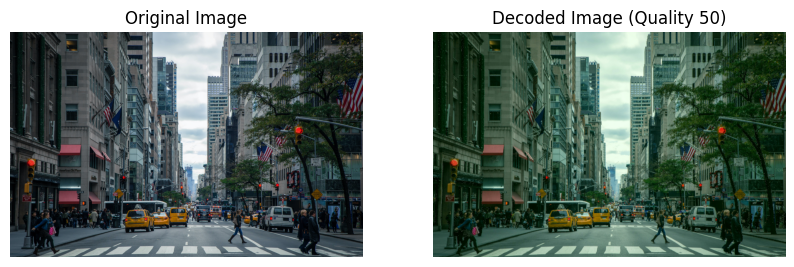

Original Image Size: 49699584 bytes
Compressed Image Size: 7606463 bytes
Compression Ratio: 84.70


In [ ]:
# Load the input image
image_path = 'img2.jpg'
image = cv2.imread(image_path)

# Specify the amount of lossy compression (quality factor)
compression_quality = 50

# Encode the image using JPEG compression
quantized_blocks, cols, rows = encode_jpeg(image, quality=compression_quality)

# Perform Huffman coding and calculate the amount of memory needed to store the compressed image
coefficients = np.concatenate([block.flatten() for block in quantized_blocks])
coefficient_counts = Counter(coefficients)
huffman_tree = HuffmanTree(coefficient_counts)
codebook = huffman_tree.get_codebook()
compressed_bits = sum(len(codebook[coefficient]) for coefficient in coefficients)
compressed_size = compressed_bits // 8

# Decode the compressed image
decoded_image = decode_jpeg(quantized_blocks, cols, rows, quality=compression_quality)

# Display the original and decoded images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Decoded Image (Quality {})'.format(compression_quality))
axes[1].axis('off')
plt.show()

# Print the image size comparison
original_size = image.size
print('Original Image Size: {} bytes'.format(original_size))
print('Compressed Image Size: {} bytes'.format(compressed_size))
compression_ratio = (1 - compressed_size / original_size)*100
print('Compression Ratio: {:.2f}'.format(compression_ratio))

In [ ]:
cv2.imwrite('decoded_image.jpg', decoded_image)
!du -h decoded_image.jpg

2.4M	decoded_image.jpg


As it can be seen the decoded image in both samples has lower size compared to the original image.

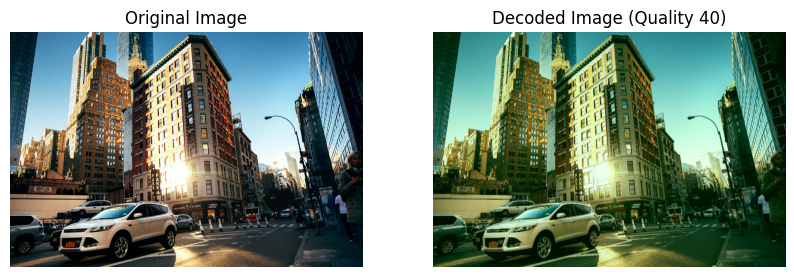

Original Image Size: 59885568 bytes
Compressed Image Size: 9114697 bytes
Compression Ratio: 84.78


In [ ]:
# Load the input image
image_path = 'img1.jpg'
image = cv2.imread(image_path)

# Specify the amount of lossy compression (quality factor)
compression_quality = 40

# Encode the image using JPEG compression
quantized_blocks, cols, rows = encode_jpeg(image, quality=compression_quality)

# Perform Huffman coding and calculate the amount of memory needed to store the compressed image
coefficients = np.concatenate([block.flatten() for block in quantized_blocks])
coefficient_counts = Counter(coefficients)
huffman_tree = HuffmanTree(coefficient_counts)
codebook = huffman_tree.get_codebook()
compressed_bits = sum(len(codebook[coefficient]) for coefficient in coefficients)
compressed_size = compressed_bits // 8

# Decode the compressed image
decoded_image = decode_jpeg(quantized_blocks, cols, rows, quality=compression_quality)

# Display the original and decoded images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(decoded_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Decoded Image (Quality {})'.format(compression_quality))
axes[1].axis('off')
plt.show()

# Print the image size comparison
original_size = image.size
print('Original Image Size: {} bytes'.format(original_size))
print('Compressed Image Size: {} bytes'.format(compressed_size))
compression_ratio = (1 - compressed_size / original_size)*100
print('Compression Ratio: {:.2f}'.format(compression_ratio))

As it can be concluded, if you increase the compression quality, it means you are reducing the amount of compression applied to the image. Higher quality factors result in less lossy compression, which means the compressed image will closely resemble the original image with fewer artifacts or visual distortions. However, higher quality factors also lead to larger file sizes because less compression is applied.

On the other hand, if you decrease the compression quality, it means you are increasing the amount of compression applied to the image. Lower quality factors result in more aggressive compression, which can lead to a significant reduction in file size but at the cost of reduced image quality. Decreasing the quality factor introduces more noticeable artifacts and visual distortions in the compressed image.